# Text to Private Key Generator

## Mockup Implementation

This project aims to implement a mockup of a text-to-private-key generator. The idea is to take a text input and convert it into a private key that can be used for cryptographic purposes. This implementation will demonstrate the basic concept and provide a foundation for further development and refinement.

The key steps involved in this process include:
1. Accepting a text input from the user.
2. Processing the text to ensure it meets the necessary criteria for key generation.
3. Converting the processed text into a private key using a suitable algorithm.
4. Displaying or storing the generated private key for use in cryptographic operations.

This mockup will focus on the core functionality and may not include advanced features such as error handling, security measures, or optimization.

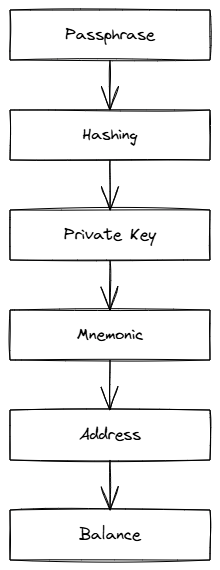

Imports

In [2]:
import hashlib
from mnemonic import Mnemonic
from bitcoin import privtopub, pubtoaddr
import requests

`hash_passphrase(passphrase, page_number)`

In [3]:
def hash_passphrase(passphrase, page_number):
    # Hash the passphrase page_number
    iterations = page_number
    hash_result = passphrase.encode()
    for _ in range(iterations):
        hash_result = hashlib.sha256(hash_result).digest()
    return hash_result

`generate_private_key_and_mnemonic(passphrase, page_number)`

In [4]:
def generate_private_key_and_mnemonic(passphrase, page_number):
    # Get the final hash
    final_hash = hash_passphrase(passphrase, page_number)
    
    # Convert the hash to a Bitcoin private key (hex format)
    private_key = final_hash.hex()
    
    # Generate the 24-word mnemonic phrase
    mnemo = Mnemonic("english")
    mnemonic_phrase = mnemo.to_mnemonic(final_hash)
    
    return private_key, mnemonic_phrase

`get_bitcoin_address(private_key)`

In [5]:
def get_bitcoin_address(private_key):
    # Derive the public key from the private key
    public_key = privtopub(private_key)
    
    # Derive the Bitcoin address from the public key
    bitcoin_address = pubtoaddr(public_key)
    
    return bitcoin_address

`check_balance(bitcoin_address)`

In [6]:
def check_balance(bitcoin_address):
    # Use BlockCypher API to check the balance
    url = f"https://api.blockcypher.com/v1/btc/main/addrs/{bitcoin_address}/balance"
    response = requests.get(url)
    data = response.json()
    
    balance = data.get('balance', 0)
    return balance


Execution

In [19]:
passphrase = 'In the beginning God created the heaven and the earth.'
iterations = 100

In [20]:
private_key, mnemonic_phrase = generate_private_key_and_mnemonic(passphrase, iterations)
bitcoin_address = get_bitcoin_address(private_key)
balance = check_balance(bitcoin_address)

print("Bitcoin Private Key:", private_key)
print("24-word Mnemonic Phrase:", mnemonic_phrase)
print("Bitcoin Address:", bitcoin_address)
print("Balance:", balance, "satoshis")

Bitcoin Private Key: 568794820254ead00259d947ca1c343bf214cee6475cd21455e5ad35afbb7f21
24-word Mnemonic Phrase: final device calm again exchange gym annual depth elephant extend artist jewel candy guess october twist spirit pencil just foil foot tank wish connect
Bitcoin Address: 1JRZuG5csM2v7YHAJ9cMMZpC3A1REYsnKK
Balance: 0 satoshis


In [21]:
words = mnemonic_phrase.split()
enumerated_phrase = "\n".join([f"{i+1}. {word}" for i, word in enumerate(words)])
print(enumerated_phrase)

1. final
2. device
3. calm
4. again
5. exchange
6. gym
7. annual
8. depth
9. elephant
10. extend
11. artist
12. jewel
13. candy
14. guess
15. october
16. twist
17. spirit
18. pencil
19. just
20. foil
21. foot
22. tank
23. wish
24. connect


Save to a text phile for Sparrow Wallet

In [22]:
# Save to a text file
with open("mnemonic_phrase.txt", "w") as file:
    file.write(mnemonic_phrase)

print("Mnemonic phrase saved to mnemonic_phrase.txt")

Mnemonic phrase saved to mnemonic_phrase.txt
